<a href="https://colab.research.google.com/github/eggtgg/bt_minhtriho_all/blob/main/k2_n3/thuat_toan/do_an/cai_dat_thuat_toan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cài đặt thuật toán
**Họ và tên:** Hồ Minh Trí

**Lớp:** Khoa học dữ liệu và Trí tuệ nhân tạo- K1

**Với tập dữ liệu mẫu tượng trưng gồm X = [1;2;3;4] và Y = [2;4;6;8]**
- Ta cần tìm: Hệ số góc (m) và hệ số chặn (b)
- Dễ dàng nhận thấy đường thẳng hồi quy đi qua góc tọa độ khi đó b = 0



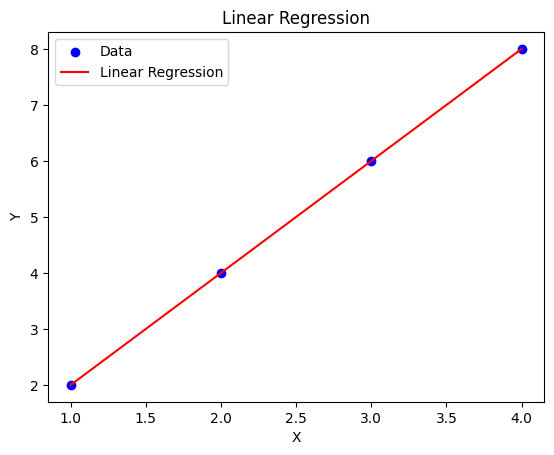

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mẫu
X = np.array([1, 2, 3, 4])
Y = np.array([2, 4, 6, 8])

# Số lượng mẫu
m = len(X)

# Thêm cột x0 = 1 vào ma trận X để tính intercept
X = np.c_[np.ones(m), X]

# Tính ma trận nghịch đảo của X.T * X
X_transpose_X_inv = np.linalg.inv(np.dot(X.T, X))

# Tính theta = (X.T * X)^(-1) * X.T * Y
theta = np.dot(np.dot(X_transpose_X_inv, X.T), Y)

# Vẽ đường hồi quy
plt.scatter(X[:, 1], Y, color='blue', label='Data')
plt.plot(X[:, 1], np.dot(X, theta), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

**Đặt b bằng 0 ta giải quyết bài toán bằng python**
- Kết quả khi chạy đoạn mã: Hệ số góc (slope) m = 2.0151977097271487
- Ta suy ra được phương trình của đường thẳng hồi quy là y =2x.


In [ ]:
import numpy as np

# Tập dữ liệu
X = np.array([1, 2, 3, 4])
Y = np.array([2, 4, 6, 8])
m_s = []

# Số lần lặp và learning rate
epochs = 10
learning_rate = 0.03

# Khởi tạo hệ số m và b
m = 8
b = 0

# Gradient Descent
for epoch in range(epochs):
    # Tính giá trị dự đoán
    Y_pred = m * X #+ b
    
    # Tính gradient của hàm mất mát
    gradient_m = -2 * np.mean(X * (Y - Y_pred))
    #gradient_b = -2 * np.mean(Y - Y_pred)
    
    # Cập nhật các hệ số m và b
    m_s.append(m)
    m -= learning_rate * gradient_m
    #b -= learning_rate * gradient_b

m_s.append(m)
# In ra kết quả
print("Hệ số góc (slope) m =", m)
#print("Hệ số chặn (intercept) b =", b)

Hệ số góc (slope) m = 2.0151977097271487


**Đồ thị hàm mất mát**
- Đồ thị có dạng Parabol
- Đạt cực tiểu khi m = 2

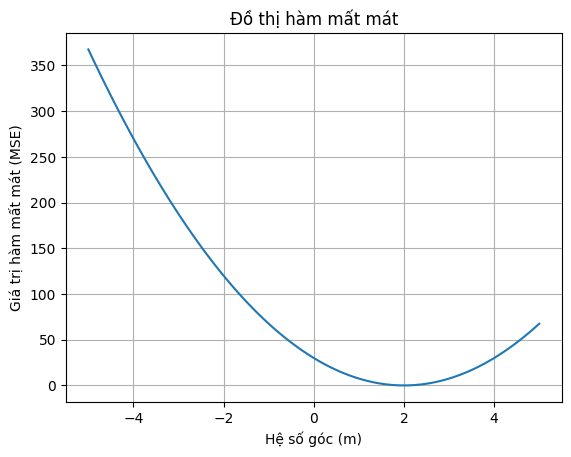

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tập dữ liệu
X = np.array([1, 2, 3, 4])
Y = np.array([2, 4, 6, 8])

# Hệ số góc m
m_values = np.linspace(-5, 5, 100)  # Giá trị của m trong khoảng từ -5 đến 5
mse_values = []  # Giá trị của hàm mất mát

# Tính giá trị của hàm mất mát cho từng giá trị của m
for m in m_values:
    Y_pred = m * X  # Dự đoán giá trị y
    mse = np.mean((Y - Y_pred) ** 2)  # Tính giá trị hàm mất mát (MSE)
    mse_values.append(mse)

# Biểu diễn đồ thị hàm mất mát
plt.plot(m_values, mse_values)
plt.xlabel('Hệ số góc (m)')
plt.ylabel('Giá trị hàm mất mát (MSE)')
plt.title('Đồ thị hàm mất mát')
plt.grid(True)
plt.show()

**Sự giảm dần của hàm mất mát, khi thực hiện Gradient descent với hệ số góc m và b=0**
- bắt đầu tại m = 8 và Tốc độ học = 0.03
- Sau 10 lần lặp giá trị của m đạt 2.015

In [ ]:
def mse_m(m):
    Y_pred = m * X
    return np.mean((Y - Y_pred) ** 2)/2

In [ ]:
add_y_s = np.vectorize(mse_m)

In [ ]:
y_s = add_y_s(m_s)

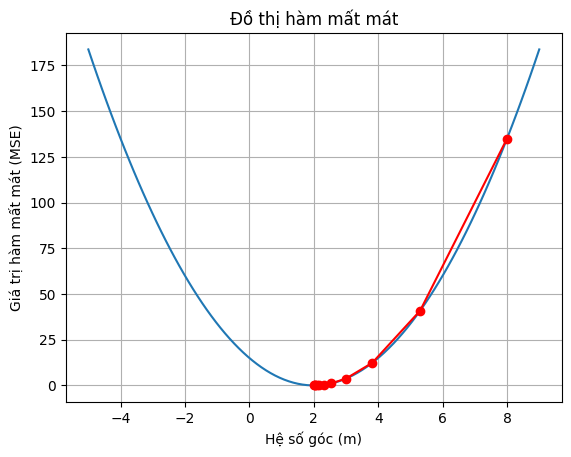

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tập dữ liệu
X = np.array([1, 2, 3, 4])
Y = np.array([2, 4, 6, 8])

# Hệ số góc m
m_values = np.linspace(-5, 9, 100)  # Giá trị của m trong khoảng từ -5 đến 5
mse_values = []  # Giá trị của hàm mất mát

# Tính giá trị của hàm mất mát cho từng giá trị của m
for m in m_values:
    Y_pred = m * X  # Dự đoán giá trị y
    mse = np.mean((Y - Y_pred) ** 2)/2  # Tính giá trị hàm mất mát (MSE)
    mse_values.append(mse)

# Biểu diễn đồ thị hàm mất mát
plt.plot(m_values, mse_values)
plt.plot(m_s, y_s, 'o-', color='red', label='Dữ liệu thực tế')
plt.xlabel('Hệ số góc (m)')
plt.ylabel('Giá trị hàm mất mát (MSE)')
plt.title('Đồ thị hàm mất mát')
plt.grid(True)
plt.show()


In [ ]:
m_s

[8,
 -1.0,
 3.5,
 1.25,
 2.375,
 1.8125,
 2.09375,
 1.953125,
 2.0234375,
 1.98828125,
 2.005859375]

In [ ]:
y_s

array([1.35000000e+02, 3.37500000e+01, 8.43750000e+00, 2.10937500e+00,
       5.27343750e-01, 1.31835938e-01, 3.29589844e-02, 8.23974609e-03,
       2.05993652e-03, 5.14984131e-04, 1.28746033e-04])